In [2]:
import tkinter as tk
from solcore.solar_cell_solver import solar_cell_solver
import time
# from lib_save_file import *
from lib_save_data import *
# from material_of_InSb_GaSb import *
from material_and_layer_QD import *
from solcore.light_source import LightSource
import matplotlib.pyplot as plt
import solcore.poisson_drift_diffusion as PDD
from solcore.structure import SolcoreMaterialToStr, ToStructure, ToLayer, InLineComposition
import mpld3
# import numpy as np
from matplotlib import pyplot as plt, cm, ticker
from solcore.poisson_drift_diffusion.DriftDiffusionUtilities import SetMeshParameters
from solcore.structure import SolcoreMaterialToStr
# from numpy import trapz
# from solcore.light_source import LightSource
from material_of_InSb_GaSb import *
from material_and_layer_QD import *
from lib_save_file import *
from solcore.solar_cell_solver import solar_cell_solver
from solcore.light_source import LightSource
import time


In [4]:
from solcore.state import State
import mpld3
from matplotlib import pyplot as plt, cm, ticker
# from material_of_InSb_GaSb import *
from material_and_layer_QD import *
from lib_save_file import *
from solcore.solar_cell_solver import solar_cell_solver
import time
from constant import *

# vint = np.linspace(-3, 3, 600)
# V = np.linspace(-1.5, 0, 300)  # np

# wl = np.linspace(350, 3000, 1001) * 1e-9  # version1
# light_source = LightSource(source_type="standard"
#                            , version="AM1.5g"
#                            , x=wl
#                            , output_units="photon_flux_per_m"
#                            , concentration=1
#                            )
data_solar_cell = dict(
    T=None,
    absorbed=None,
    short_circuit_data=None,
    pdd_data=None,
    recombination_currents=None,
    equilibrium_data=None,
    iv=None,
    qe=None,
    offset=0,
    note='note',
    list_structure=[],
    x_axis=[],
    x_axis_name='None',
    mode='None',
)


def defultsaveing(solarcell, saveaddrest, version, save=True):
    saveaddrest["T"] = solarcell.T
    saveaddrest['absorbed'] = solarcell.absorbed
    saveaddrest['short_circuit_data'] = solarcell[0].short_circuit_data.copy()
    saveaddrest['pdd_data'] = solarcell[0].pdd_data.copy()
    saveaddrest['recombination_currents'] = solarcell[0].recombination_currents.copy()
    saveaddrest['equilibrium_data'] = solarcell[0].equilibrium_data.copy()
    saveaddrest['iv'] = solarcell.iv.copy()
    saveaddrest['offset'] = solarcell[0].offset
    saveaddrest['qe'] = solarcell[0].qe.copy()
    if save:
        with open(f'{version}.pkl', 'wb') as fin:
            pickle.dump(saveaddrest, fin)
            print('dictionary saved successfully to file')
    return saveaddrest


def load_old_data(version):
    with open(f'{version}', 'rb') as fp:
        data = pickle.load(fp)
    print('Loading dictionary complete')
    # print(data["allI"])
    return data


def save_set_of_data_sun_constant(set_of_data, version, focus_area=None):
    if focus_area is None:
        focus_area = (350, 650)
    simpifly = None
    fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
    fig_5, ax1_5 = plt.subplots(1, 1, figsize=(6, 4))
    fig1, axes = plt.subplots(2, 2, figsize=(11.25, 8))
    fig2, axIV = plt.subplots(1, 1, figsize=(8, 6))
    fig2_5, axJ = plt.subplots(1, 1, figsize=(8, 6))
    fig3, axCar = plt.subplots(len(set_of_data), 1, figsize=(16, 5 * len(set_of_data)))
    fig3_5, axCar2 = plt.subplots(len(set_of_data), 1, figsize=(16, 5 * len(set_of_data)))
    fig_b1, band1 = plt.subplots(len(set_of_data), 1, figsize=(16, 5 * len(set_of_data)))
    fig_b2, band2 = plt.subplots(len(set_of_data), 1, figsize=(16, 5 * len(set_of_data)))
    if len(set_of_data) > 5:
        simpifly = np.linspace(0, len(set_of_data), 5)
        simpifly = [int(i) for i in simpifly].append(len(set_of_data) - 1)
    Pmpp = []
    Isc = []
    Voc = []
    FF = []
    for num, data in enumerate(set_of_data):
        print(f'loading {data["mode"]}')
        ax1.plot(data['qe']["WL"] * 1e9, data["qe"]["EQE"], label=f"{data['mode']} ")
        ax1.legend(loc="upper right", frameon=False)
        ax1.set_xlabel("Wavelength (nm)")
        ax1.set_ylabel("EQE")
        ax1.set_ylim(0, 1.1)
        ax1.set_xlim(350, 1000)
        ax1.legend()
        plt.tight_layout()
        fig1.suptitle(f"{version}")

        ax1_5.semilogy(data['qe']["WL"] * 1e9, data["qe"]["EQE"], label=f"{data['mode']} ")
        ax1_5.legend(loc="upper right", frameon=False)
        ax1_5.set_xlabel("Wavelength (nm)")
        ax1_5.set_ylabel("EQE")
        ax1_5.set_ylim(1e-8, 1)
        ax1_5.set_xlim(900, 1200)
        ax1_5.legend()
        fig_5.suptitle(f"{version}")

        linestyle = ["-", "--", ":", "-.", ]
        # marker = [".", ",", "o", 'v', "^", "<", ">", "s", "p", "*", "h", "+", "x", "D", "d"]
        color = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple']
        Pmpp.append(data["iv"]["Pmpp"])
        Isc.append(data["iv"]["Isc"])
        Voc.append(data["iv"]["Voc"])
        FF.append(data["iv"]["FF"])
        if simpifly is None:
            # axIV.plot(-data["iv"]["IV"][0], data["iv"]["IV"][1] / -10, label=f"{data['mode']}")
            # axIV.plot(abs(data["iv"]["IV"][0]), abs(data["iv"]["IV"][1] / 10), label=f"{data['mode']}")
            axIV.plot(data["iv"]["IV"][0], data["iv"]["IV"][1] / -10, label=f"{data['mode']}")

            try:

                axJ.semilogy(abs(data["iv"]["IV"][0], data["iv"]["IV"][1]), label=f"J{data['mode']}", color=color[num], linestyle=linestyle[0])
                axJ.semilogy(abs(V), data['recombination_currents']['Jrad'], color=color[num],linestyle=linestyle[1])
                axJ.semilogy(abs(V), data['recombination_currents']['Jsrh'], color=color[num],linestyle=linestyle[2])
                axJ.semilogy(abs(V), data['recombination_currents']['Jsur'], color=color[num],linestyle=linestyle[3])
                axJ.semilogy(abs(V), data['recombination_currents']['Jaug'], color=color[num],linestyle='-.', dashes=(5, 2, 1, 1, 1, 2))
            except:
                pass

        elif num in simpifly:
            # axIV.plot(-data["iv"]["IV"][0], data["iv"]["IV"][1] / -10, label=f"{data['mode']}")
            # axIV.plot(abs(data["iv"]["IV"][0]), abs(data["iv"]["IV"][1] / 10), label=f"{data['mode']}")
            axIV.plot(data["iv"]["IV"][0], data["iv"]["IV"][1] / -10, label=f"{data['mode']}")

            try:
                # axJ.semilogy(-data["iv"]["IV"][0], abs(data["iv"]["IV"][1]), label=f"J{data['mode']}", color=color[num], linestyle=linestyle[0])
                # axJ.semilogy(-V, abs(data['recombination_currents']['Jrad']), color=color[num],linestyle=linestyle[1])
                # axJ.semilogy(-V, abs(data['recombination_currents']['Jsrh']), color=color[num],linestyle=linestyle[2])
                # axJ.semilogy(-V, abs(data['recombination_currents']['Jsur']), color=color[num],linestyle=linestyle[3])
                # axJ.semilogy(-V, abs(data['recombination_currents']['Jaug']), color=color[num], linestyle='-.', dashes=(5, 2, 1, 1, 1, 2))

                axJ.semilogy(abs(data["iv"]["IV"][0]), abs(data["iv"]["IV"][1]), label=f"J{data['mode']}", color=color[num],linestyle=linestyle[0])
                axJ.semilogy(abs(V), abs(data['recombination_currents']['Jrad']), color=color[num], linestyle=linestyle[1])
                axJ.semilogy(abs(V), abs(data['recombination_currents']['Jsrh']), color=color[num], linestyle=linestyle[2])
                axJ.semilogy(abs(V), abs(data['recombination_currents']['Jsur']), color=color[num], linestyle=linestyle[3])
                axJ.semilogy(abs(V), abs(data['recombination_currents']['Jaug']), color=color[num], linestyle='-.', dashes=(5, 2, 1, 1, 1, 2))


            except:
                pass
        axIV.set_ylim(0, 30)
        axIV.set_xlim(-1.5, 1.5)
        axIV.set_xlabel("Voltage (V)")
        axIV.set_ylabel("J$_{SC}$ (mA/cm$^{2}$)")
        axIV.legend()
        plt.tight_layout()

        axJ.set_xlabel("Voltage (V)")
        axJ.set_ylabel("J$_{SC}$ (A/m$^{2}$)")
        axJ.set_ylim(1e-4, 1e5)

        axJ.legend()
        plt.tight_layout()

        try:
            xsc = data["short_circuit_data"]['Bandstructure']['x'] + data['offset']
            nsc = data["short_circuit_data"]['Bandstructure']['n']
            psc = data["short_circuit_data"]['Bandstructure']['p']
            xeq = data["equilibrium_data"]['Bandstructure']['x'] + data['offset']
            neq = data["equilibrium_data"]['Bandstructure']['n']
            peq = data["equilibrium_data"]['Bandstructure']['p']
            axCar[num].set_title(data["mode"])
            axCar[num].semilogy(xsc * 1e9, nsc, 'b', label='e @ short circuit')
            axCar[num].semilogy(xsc * 1e9, psc, 'r', label='h @ short circuit')
            axCar[num].semilogy(xeq * 1e9, neq, 'b--', label='e @ equilibrium')
            axCar[num].semilogy(xeq * 1e9, peq, 'r--', label='h @ equilibrium')

            axCar[num].set_xlabel('Position (nm)')
            axCar[num].set_ylabel('Carrier density (m$^{-3}$)')
            axCar[num].set_ylim(1e6, 1e25)
            axCar[num].legend()
            axCar2[num].set_title(data["mode"])
            axCar2[num].semilogy(xsc * 1e9, nsc, 'b', label='e @ short circuit')
            axCar2[num].semilogy(xsc * 1e9, psc, 'r', label='h @ short circuit')
            axCar2[num].semilogy(xeq * 1e9, neq, 'b--', label='e @ equilibrium')
            axCar2[num].semilogy(xeq * 1e9, peq, 'r--', label='h @ equilibrium')
            axCar2[num].set_xlabel('Position (nm)')
            axCar2[num].set_ylabel('Carrier density (m$^{-3}$)')
            axCar2[num].legend()
            axCar2[num].set_xlim(focus_area)
            axCar2[num].set_ylim(1e6, 1e25)

            plt.tight_layout()

        except:
            print("something wrong with carrier distribution")
            pass
        try:
            x = data['pdd_data']['positive_V']['Bandstructure']['x']
            Ec = data['pdd_data']['positive_V']['Bandstructure']['Ec']
            Ev = data['pdd_data']['positive_V']['Bandstructure']['Ev']
            Efc = data['pdd_data']['positive_V']['Bandstructure']['Efe']
            Efh = data['pdd_data']['positive_V']['Bandstructure']['Efh']
            potential = data['pdd_data']['positive_V']['Bandstructure']['potential']

            band1[num].set_title(data["mode"])
            band1[num].plot(x * 1e9, Ec, 'b', label="Ec")
            band1[num].plot(x * 1e9, Ev, 'r', label="Ev")
            band1[num].plot(x * 1e9, Efc, 'b--', label="Efe")
            band1[num].plot(x * 1e9, Efh, 'r--', label="Efh")
            band1[num].plot(x * 1e9, potential, label="potential")
            band1[num].set_xlabel('Position (nm)')
            band1[num].set_ylabel('Energy (eV)')
            band1[num].legend()

            band2[num].set_title(data["mode"])
            band2[num].plot(x * 1e9, Ec, 'b', label="Ec")
            band2[num].plot(x * 1e9, Ev, 'r', label="Ev")
            band2[num].plot(x * 1e9, Efc, 'b--', label="Efe")
            band2[num].plot(x * 1e9, Efh, 'r--', label="Efh")
            band2[num].plot(x * 1e9, potential, label="potential")
            band2[num].set_xlabel('Position (nm)')
            band2[num].set_ylabel('Energy (eV)')
            band2[num].legend()
            band2[num].set_xlim(focus_area)

        except Exception as error:
            print(f'error is {error}')
    # color = [plt.cm.hsv(i / len(set_of_data)) for i in range(len(set_of_data))]
    # axes.text(0.95, 0.95, 'Sample Text', ha='right', va='top', transform=plt.gca().transAxes, fontsize=12)
    # print(Pmpp)
    axes[0, 0].plot(set_of_data[0]['x_axis'], np.array(Pmpp) / 10, color='r')
    axes[0, 0].set_xlabel(set_of_data[0]['x_axis_name'])
    axes[0, 0].set_ylabel("Efficiency (%)")

    axes[0, 1].semilogy(set_of_data[0]['x_axis'], abs(np.array(Isc)), color='g')
    axes[0, 1].set_xlabel(set_of_data[0]['x_axis_name'])
    axes[0, 1].set_ylabel("I$_{SC}$ (Am$^{-2}$)")

    axes[1, 0].plot(set_of_data[0]['x_axis'], abs(np.array(Voc)), color='b')
    axes[1, 0].set_xlabel(set_of_data[0]['x_axis_name'])
    axes[1, 0].set_ylabel("V$_{OC}$ (V)")

    axes[1, 1].plot(set_of_data[0]['x_axis'], abs(np.array(FF)) * 100, color='k')
    axes[1, 1].set_xlabel(set_of_data[0]['x_axis_name'])
    axes[1, 1].set_ylabel("Fill Factor (%)")
    try:
        for i, (num, string) in enumerate(zip(set_of_data[0]['x_axis'],set_of_data[0]['x_axis_txt'] )):
            plt.text(num - 1, 0.5, string, fontsize=10, ha='center', va='center')
    except:
        pass
    fig.suptitle(f"EQE of  {version}")
    fig_5.suptitle(f"Zoom EQE of {version}")
    fig1.suptitle(f'performance of {version}')
    fig2.suptitle(f'IV of {version}')
    fig2_5.suptitle(f'current of {version} Jtotle - Jrad-- Jsch : Jsur-. Jaug-..' )
    fig3.suptitle(f"Carrier distribution of {version}")
    fig3_5.suptitle(f"Zoom Carrier distribution of {version}")
    fig_b1.suptitle(f"band gap of {version}")
    fig_b2.suptitle(f"Zoom band gap of {version}")
    plt.tight_layout()
    fig1.tight_layout()
    fig_5.tight_layout()
    fig2.tight_layout()
    fig2_5.tight_layout()
    fig3.tight_layout()
    fig3_5.tight_layout()
    fig_b1.tight_layout()
    fig_b2.tight_layout()
    # fig1.legend()
    # plt.legend()

    fig.savefig(f'EQE_{version}.png', dpi=300)
    fig_5.savefig(f'EQE_{version}_zoom.png', dpi=300)
    fig1.savefig(f'performance_{version}.png', dpi=300)
    fig2.savefig(f'IV_curve_{version}.png', dpi=300)
    fig2_5.savefig(f'current_curve_{version}.png', dpi=300)
    mpld3.save_html(fig3, f'Carrier_distribution_{version}.html')
    mpld3.save_html(fig3_5, f'Carrier_distribution_{version}_zoom.html')
    mpld3.save_html(fig_b1, f'Band_diagramming_of_{version}.html')
    mpld3.save_html(fig_b2, f'Band_diagramming_of_{version}_zoom.html')

    save_file_direction(f'{version}', f'{version}', saveing_data=set_of_data)

    movefile(f'IV_curve_{version}.png', f'{version}')
    movefile(f'current_curve_{version}.png', f'{version}')
    movefile(f'performance_{version}.png', f'{version}')
    movefile(f'EQE_{version}_zoom.png', f'{version}')
    movefile(f'EQE_{version}.png', f'{version}')
    # movefile(f'carrier_distribution{version}.html', f'{version}')

    # movefile
    print('save complete')


def simulation1D_sun_constant(version, sim_mat, plot_note, pdd_options=None, note='', ):
    if pdd_options == None:
        pdd_options = State()

        # pdd_options.recalculate_absorption = True

        # Mesh control
        pdd_options.meshpoints = -400
        pdd_options.growth_rate = 0.7
        pdd_options.coarse = 20e-9
        pdd_options.fine = 1e-9
        pdd_options.ultrafine = 0.2e-9

        # Convergence control
        pdd_options.clamp = 20
        pdd_options.nitermax = 100
        pdd_options.ATol = 1e-14
        pdd_options.RTol = 1e-6

        # Recombination control
        pdd_options.srh = 1
        pdd_options.rad = 1
        pdd_options.aug = 0
        pdd_options.sur = 1
        pdd_options.gen = 0
    else:
        pass
    # print('pdd_options.recalculate_absorption', pdd_options.recalculate_absorption)
    print('pdd_options.meshpoints',pdd_options.meshpoints)
    print('pdd_options.growth_rate',pdd_options.growth_rate)
    print('pdd_options.coarse',pdd_options.coarse)
    print('pdd_options.fine',pdd_options.fine)
    print('pdd_options.ultrafine',pdd_options.ultrafine)
    print('pdd_options.clamp',pdd_options.clamp)
    print('pdd_options.nitermax',pdd_options.nitermax)
    print('pdd_options.RTol',pdd_options.RTol)
    print('pdd_options.ATol',pdd_options.ATol)
    print('pdd_options.RTol',pdd_options.RTol)
    print('pdd_options.srh',pdd_options.srh)
    print('pdd_options.rad',pdd_options.rad)
    print('pdd_options.aug',pdd_options.aug)
    print('pdd_options.sur',pdd_options.sur)
    print('pdd_options.gen',pdd_options.gen)

    set_of_data = []
    for mode, cell in sim_mat.items():
        data_mode = data_solar_cell.copy()
        data_mode['mode'] = mode
        data_mode['note'] = note
        data_mode['x_axis'] = plot_note['x_axis']
        data_mode['x_axis_name'] = plot_note["x_axis_name"]
        data_mode['list_structure'].append(
            "start item ================================================================================")
        _ = [data_mode['list_structure'].append(str(i)) for i in cell]
        data_mode['list_structure'].append(
            "end item   ================================================================================")
        print(data_mode['mode'])
        cell = savecell(cell, pdd_options)
        data_mode = defultsaveing(cell, data_mode, version)
        print(data_mode["iv"]["Pmpp"])
        print(data_mode["iv"]["Isc"])
        print(data_mode["iv"]["Voc"])
        print(data_mode["iv"]["FF"])
        set_of_data.append(data_mode)
        back_up_data(set_of_data, version)
    return set_of_data



def savecell(cell, pdd_options):
    offset = 0
    pdd_options.position = []
    for junction in cell:
        for layer in junction:
                    if layer.role is not None:
                        pdd_options.position.append(max(1e-10, layer.width / 5000))
                    else:
                        pdd_options.position.append(1e-11)
                    offset += layer.width
    print(pdd_options.position)
    print(len(pdd_options.position))
    solar_cell_solver(cell, "qe",
                      user_options={"light_source": light_source,
                                    "wavelength": wl,
                                    "optics_method": "TMM",
                                    # "internal_voltages": vint,
                                    # "radiative_coupling": True,
                                    # 'recalculate_absorption': pdd_options.recalculate_absorption,
                                    "position": pdd_options.position,
                                    "meshpoints": pdd_options.meshpoints,
                                    "growth_rate": pdd_options.growth_rate,
                                    "coarse": pdd_options.coarse,
                                    "fine": pdd_options.fine,
                                    "ultrafine": pdd_options.ultrafine,
                                    "clamp": pdd_options.clamp,
                                    'nitermax': pdd_options.nitermax,
                                    'ATol': pdd_options.ATol,
                                    "RTol": pdd_options.RTol,
                                    'srh': pdd_options.srh,
                                    'rad': pdd_options.rad,
                                    'aug': pdd_options.aug,
                                    'sur': pdd_options.sur,
                                    'gen': pdd_options.gen,
                                    }, )
    # IV
    solar_cell_solver(cell, "iv"
                      , user_options={"light_source": light_source,
                                      "wavelength": wl,
                                      "optics_method": None,
                                      "light_iv": True,
                                      "mpp": True,
                                      "voltages": V,
                                      "internal_voltages": vint,
                                      # "radiative_coupling": True,
                                      "position": pdd_options.position,
                                      "meshpoints": pdd_options.meshpoints,
                                      "growth_rate": pdd_options.growth_rate,
                                      "coarse": pdd_options.coarse,
                                      "fine": pdd_options.fine,
                                      "ultrafine": pdd_options.ultrafine,
                                      "clamp": pdd_options.clamp,
                                      'nitermax': pdd_options.nitermax,
                                      'ATol': pdd_options.ATol,
                                      "RTol": pdd_options.RTol,
                                      'srh': pdd_options.srh,
                                      'rad': pdd_options.rad,
                                      'aug': pdd_options.aug,
                                      'sur': pdd_options.sur,
                                      'gen': pdd_options.gen,
                                      }, )
    return cell

def sim1D_sun_constant(version, sim_mat, plot_note, note, pdd_options=None):  # sc = simulation at 1 sun
    start = time.perf_counter()
    # print([i for i in pdd_options.__dict__])
    # print(pdd_options.meshpoints)
    # print(pdd_options.growth_rate)
    # print(pdd_options.coarse)
    # print(pdd_options.fine)
    # print(pdd_options.ultrafine)
    # print(pdd_options.RTol)
    # print(pdd_options.clamp)
    set_of_data_sun_constant = simulation1D_sun_constant(version, sim_mat, plot_note, note=note,
                                                         pdd_options=pdd_options)
    stop = time.perf_counter()
    hours, minutes, seconds = sec_to_hms(stop - start)
    print(f"this run take time {hours} hours/ {minutes} minutes/ {seconds} seconds")
    # root = tk.Tk()
    # root.withdraw()
    save_set_of_data_sun_constant(set_of_data_sun_constant, version)
    # note_from_mat = dict(x_axis=list, x_axis_name="txt")
    try:
        movefile(f'Carrier_distribution_{version}.html', f'{version}')
        movefile(f'Carrier_distribution_{version}_zoom.html', f'{version}')
        movefile(f'Band_diagramming_of_{version}.html', f'{version}')
        movefile(f'Band_diagramming_of_{version}_zoom.html', f'{version}')
    except PermissionError as e:
        print(f"Error: {e}")
    # show_warning(f"this run take time {hours} hours/ {minutes} minutes/ {seconds} seconds")
    # root.update()
    # plt.show()


# SetMeshParameters(ultrafine=1e-10, growth_rate=0.8)

normal_operation = State()

normal_operation.meshpoints = -400
normal_operation.growth_rate = 0.4
normal_operation.coarse = 20e-9
normal_operation.fine = 1e-9
normal_operation.ultrafine = 0.2e-9

normal_operation.clamp = 10
normal_operation.nitermax = 1000
normal_operation.ATol = 1.5e-08
normal_operation.RTol = 1e-4

normal_operation.srh = 1
normal_operation.rad = 1
normal_operation.aug = 1
normal_operation.sur = 1
normal_operation.gen = 1

flash = State()
flash.meshpoints = 6000
flash.growth_rate = 0.5
flash.coarse = 0.2e-9
flash.fine = 0.02e-9
flash.ultrafine = 0.002e-9

flash.clamp = 0.01
flash.nitermax = 1000
flash.ATol = 1.5e-10
flash.RTol = 1e-6

flash.srh = 1
flash.rad = 0
flash.aug = 1
flash.sur = 1
flash.gen = 0




Solving QW properties...
pdd_options.meshpoints -400
pdd_options.growth_rate 0.4
pdd_options.coarse 2e-08
pdd_options.fine 1e-09
pdd_options.ultrafine 2e-10
pdd_options.clamp 10
pdd_options.nitermax 1000
pdd_options.RTol 0.0001
pdd_options.ATol 1.5e-08
pdd_options.RTol 0.0001
pdd_options.srh 1
pdd_options.rad 1
pdd_options.aug 1
pdd_options.sur 1
pdd_options.gen 1
QDSC_InSb_GaSb
[]
0
Calculating RAT...
Calculating absorption profile...
Solving QE of the solar cell...
Solving quantum efficiency...
Processing structure...
...done!

Solving equilibrium...
...done!

...done!

...done!

Solving IV of the junctions...
Solving IV...
Processing structure...
...done!

Solving equilibrium...
...done!

...done!

Processing structure...
...done!

Solving equilibrium...
...done!

...done!

...done!

Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
dictionary saved successfully to file
-0.1274621813768643
0.8437039945845584
1.4776284259645101e-05
-10224.121552726572
dictio

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


loading QDSC_InSb_GaSb
loading SC_GaAs
save success
save complete


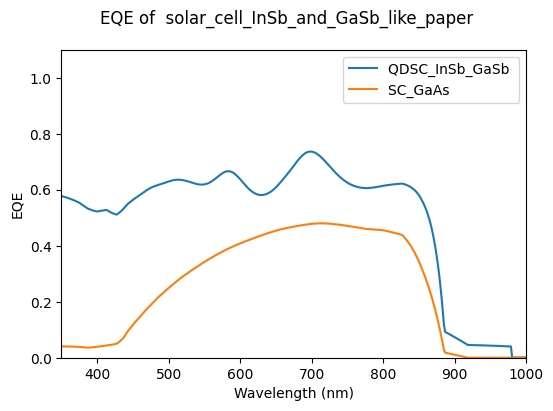

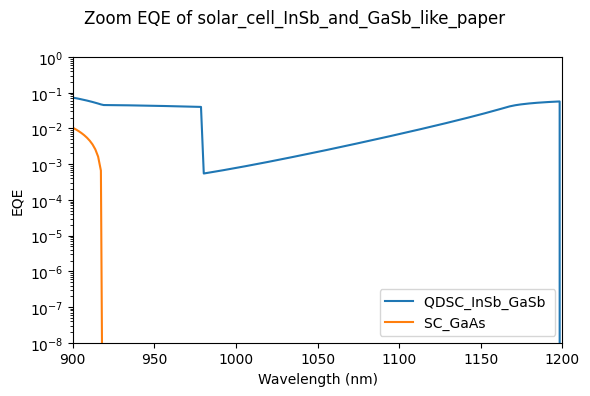

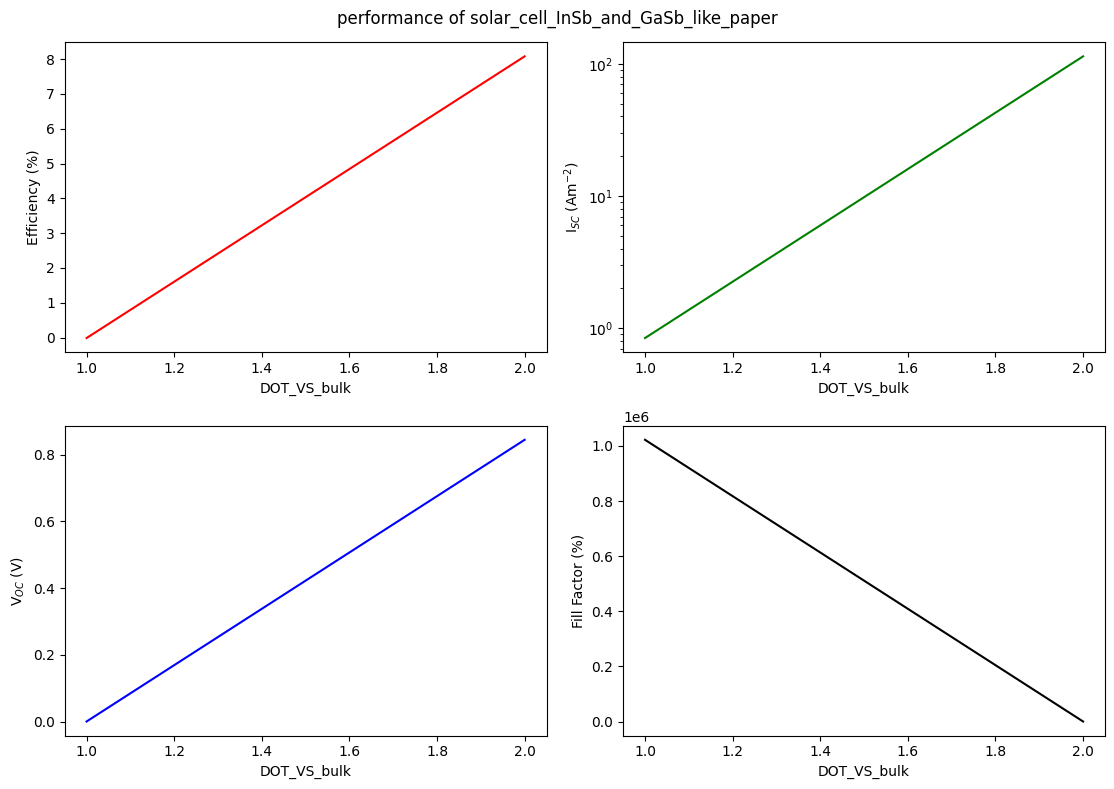

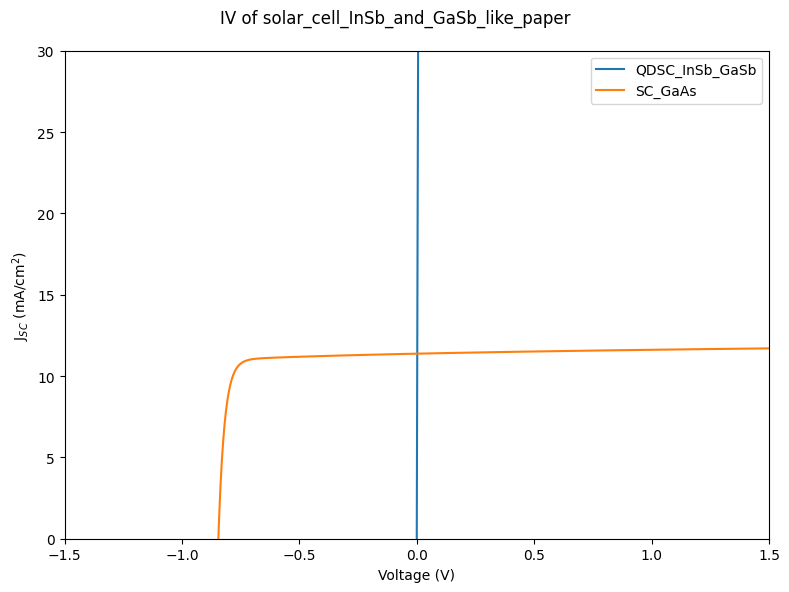

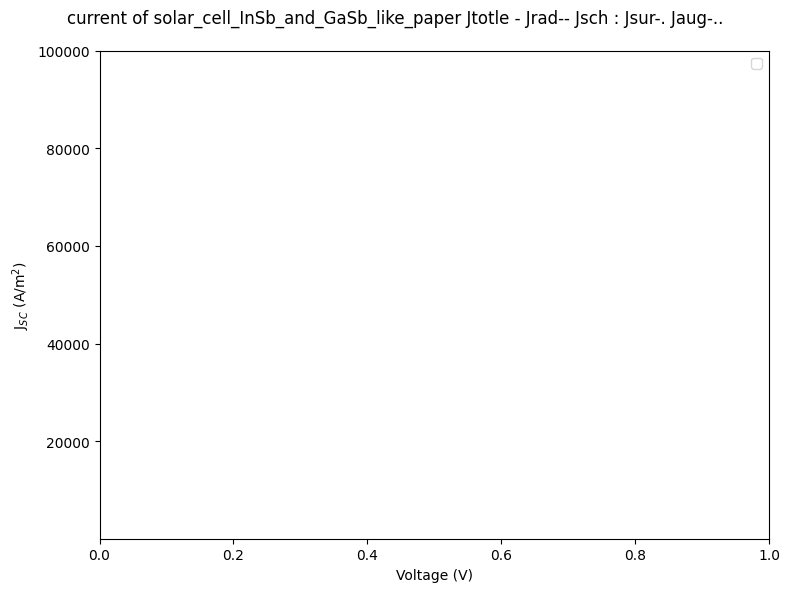

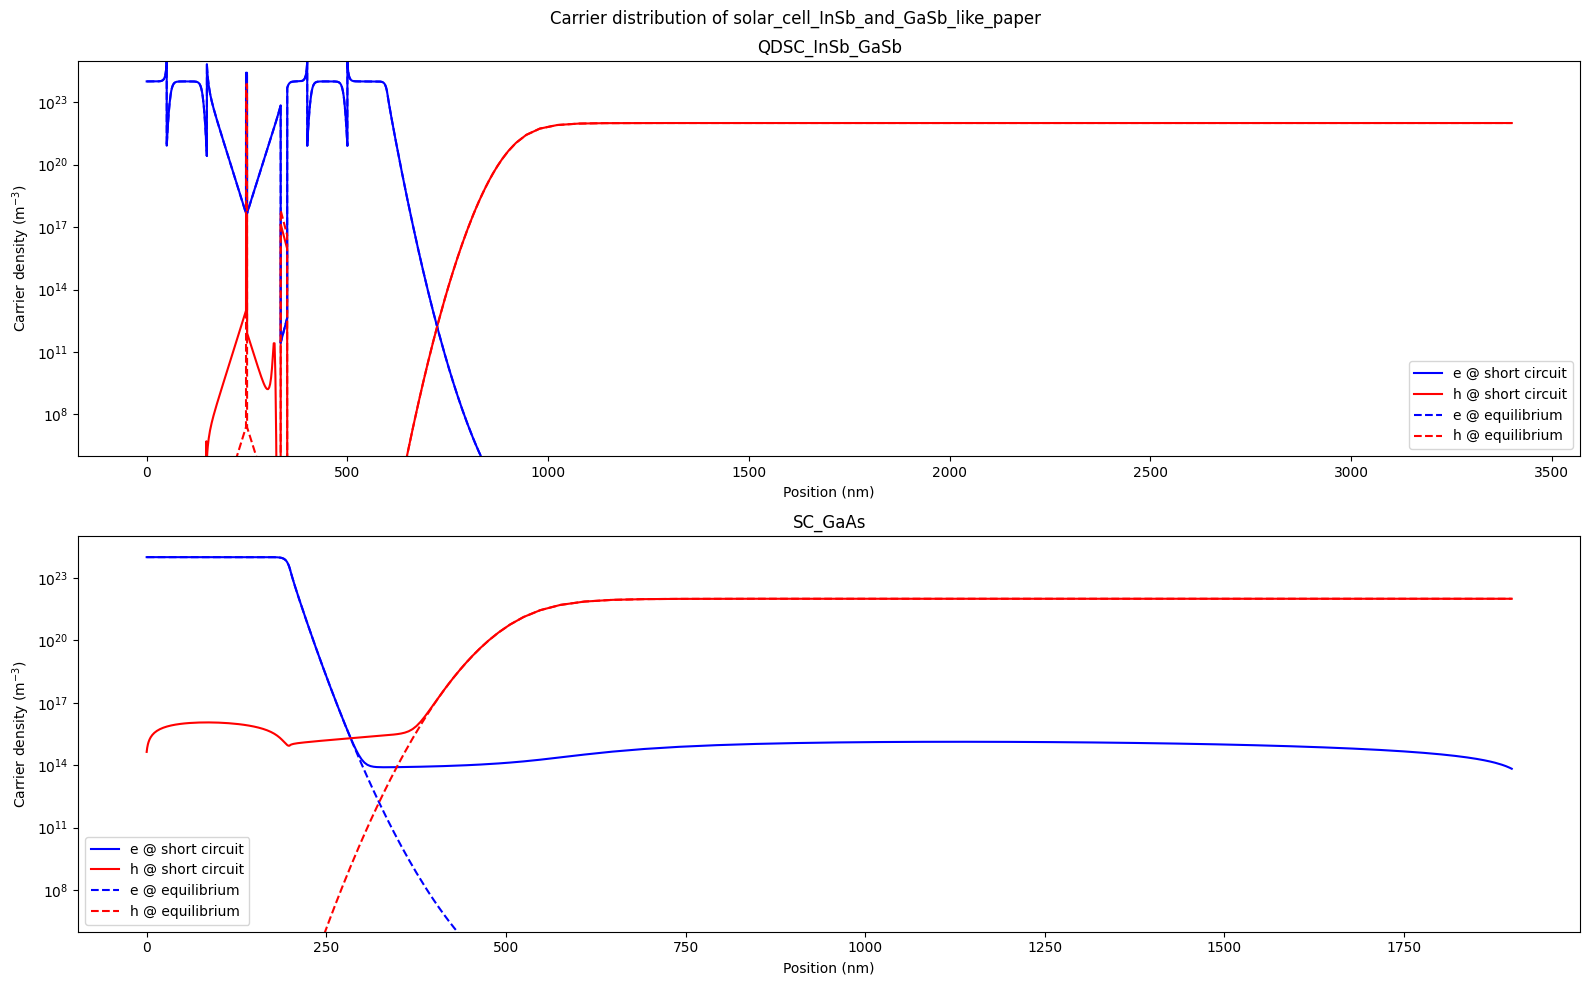

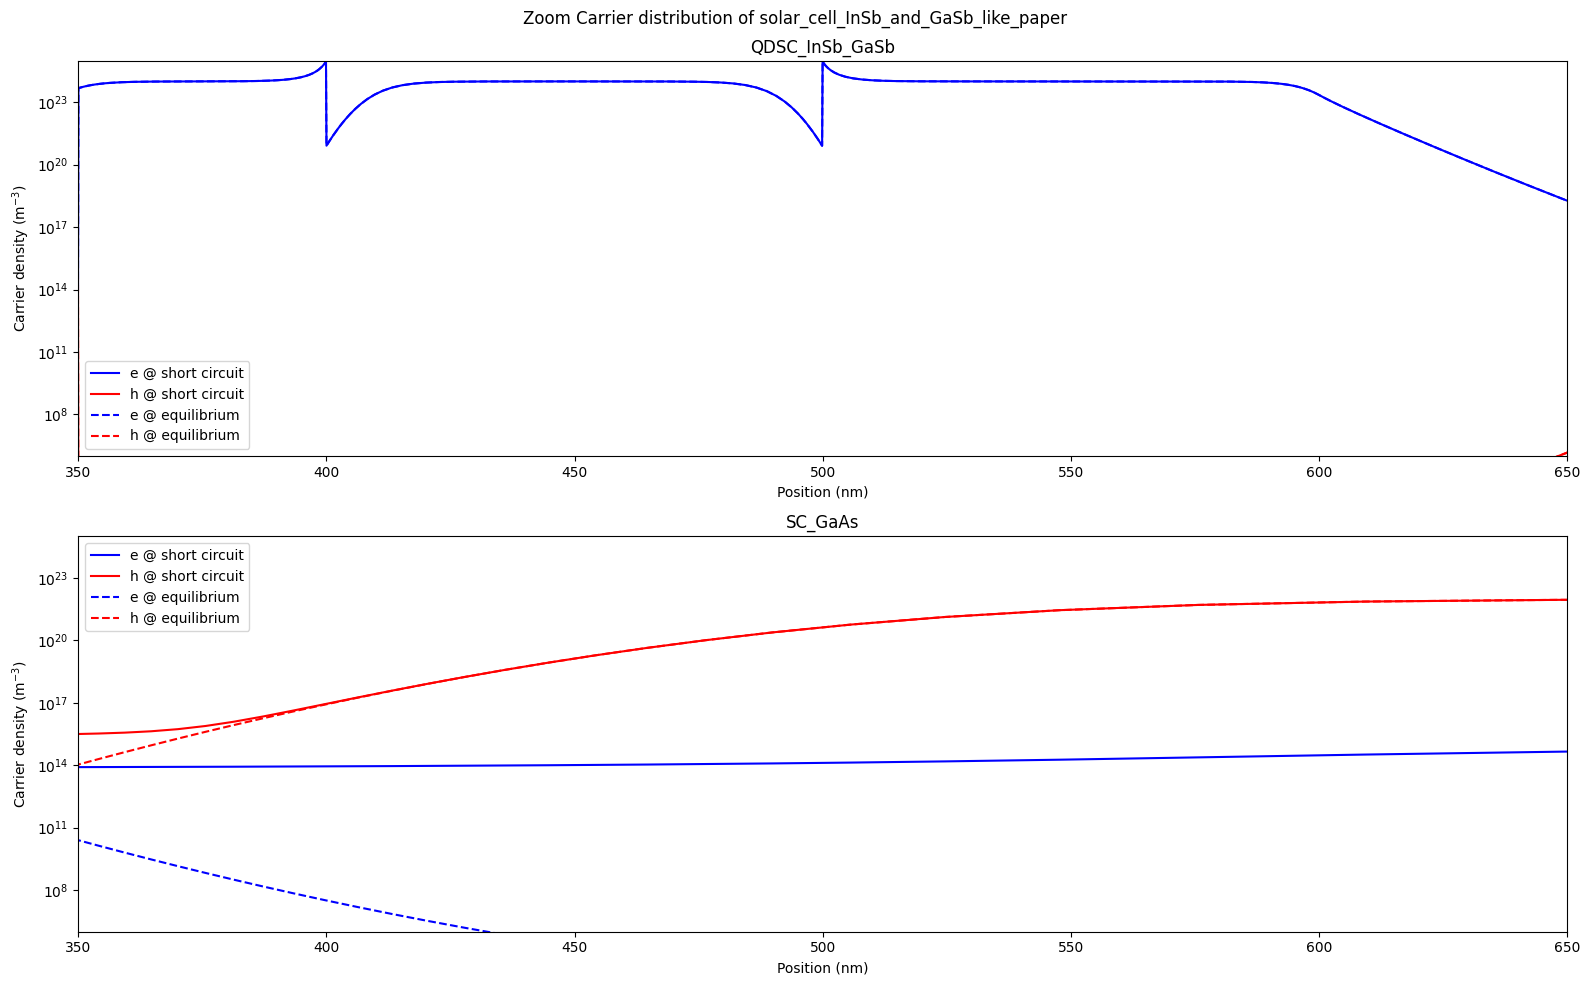

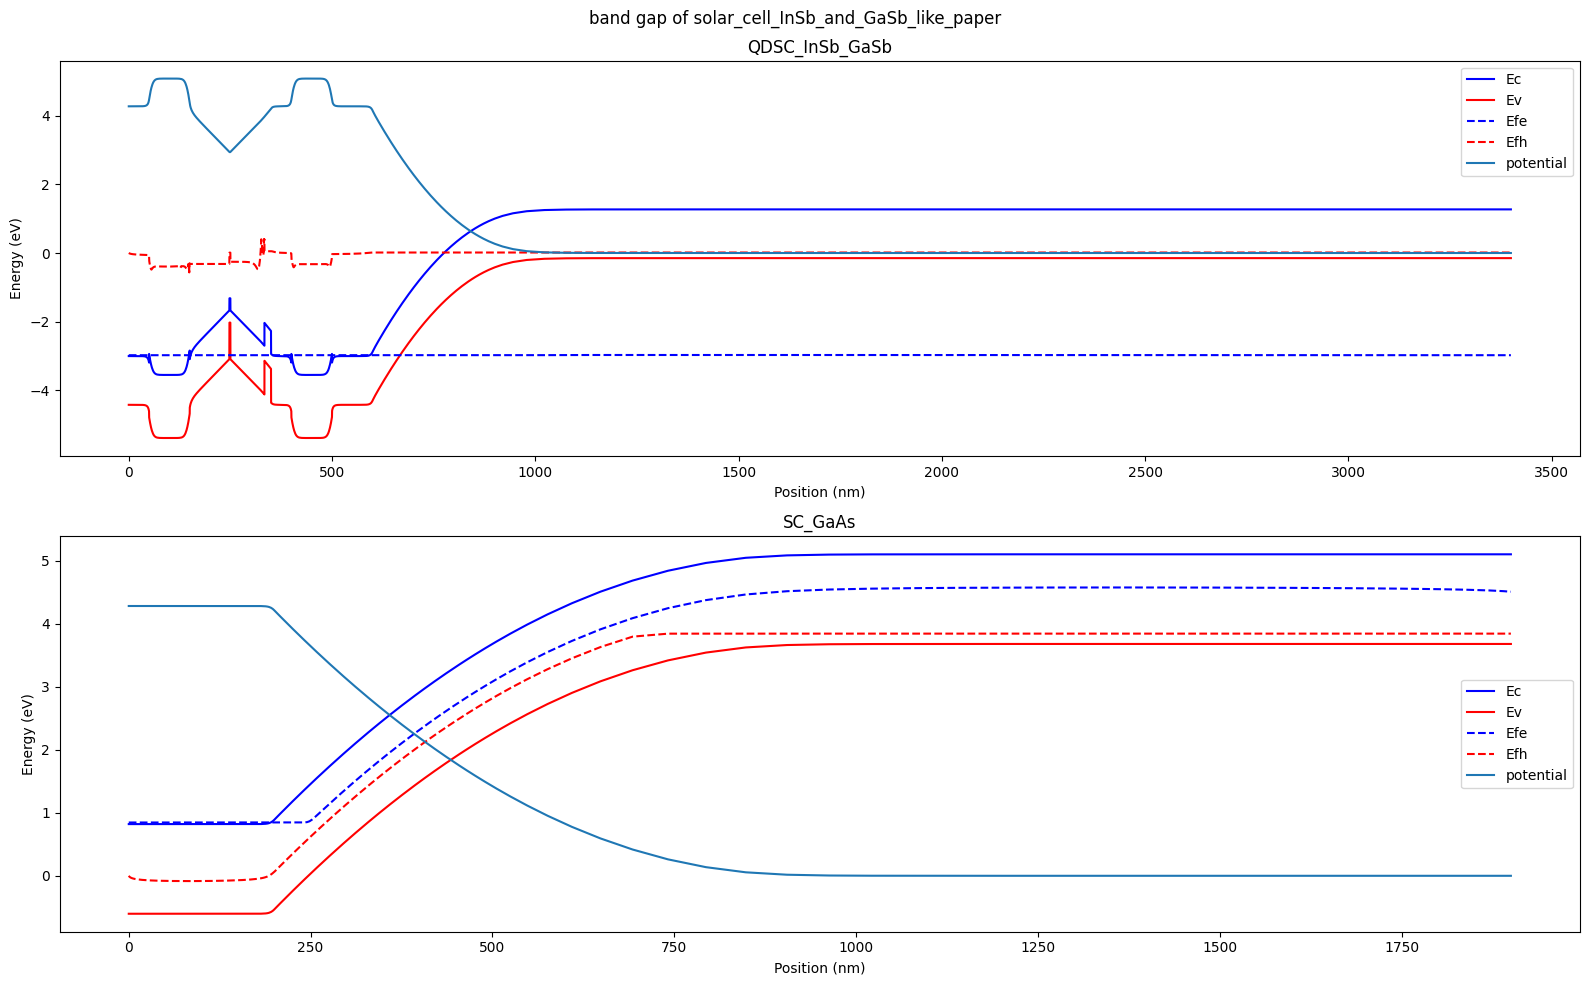

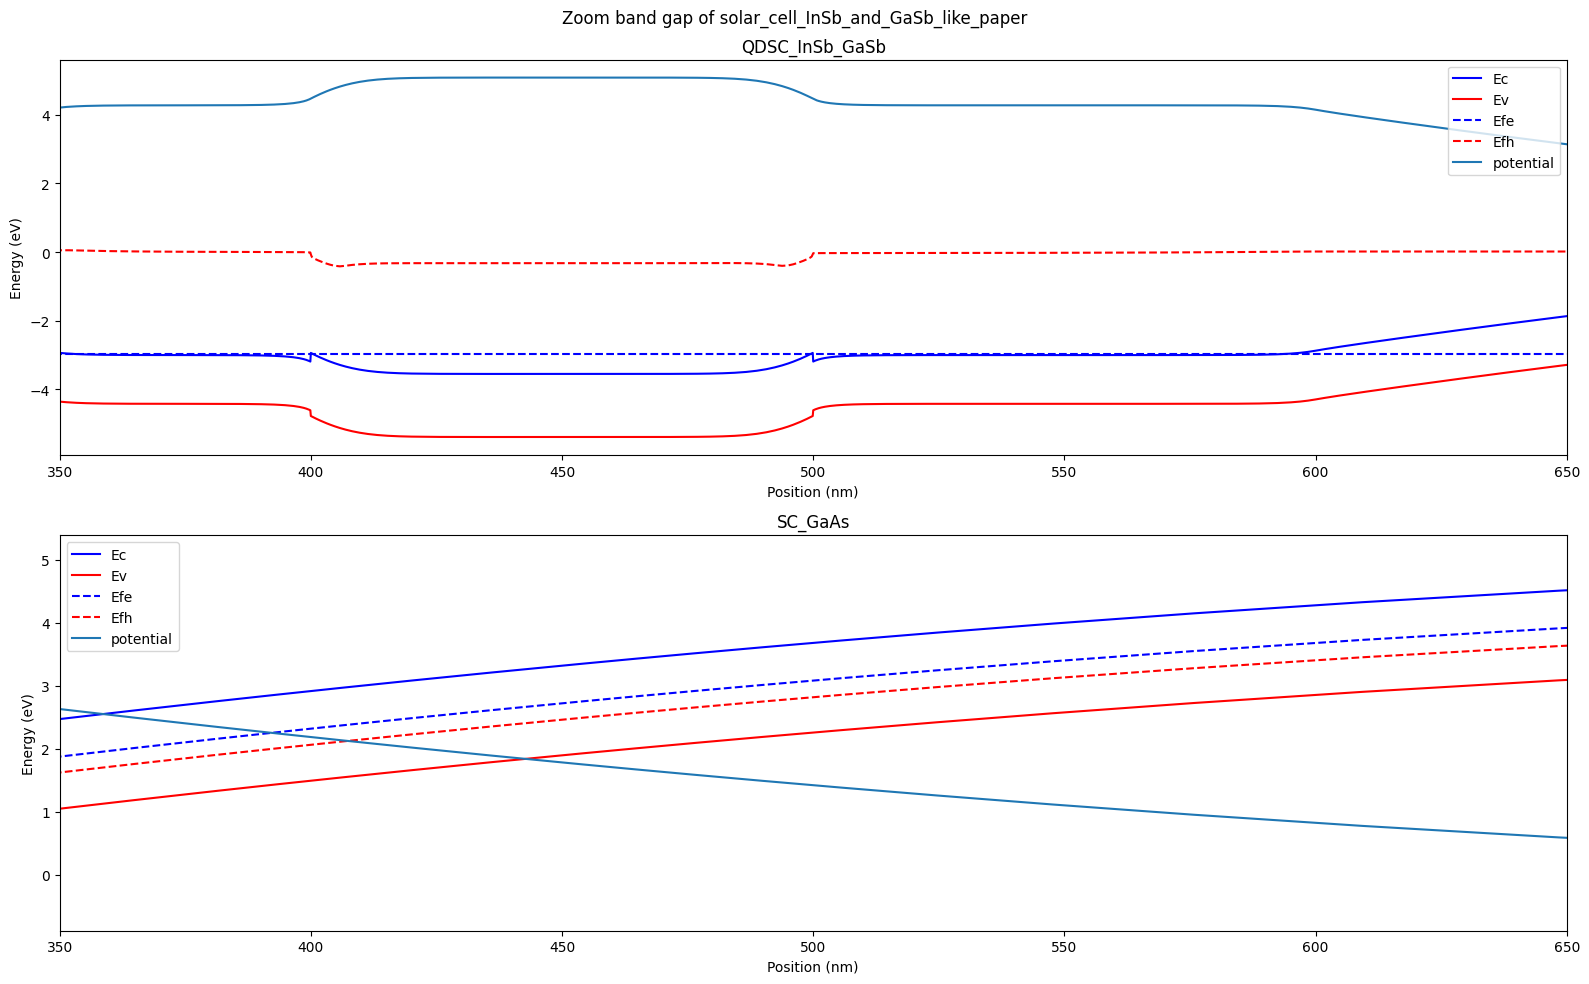

In [5]:
version = "solar_cell_InSb_and_GaSb_like_paper"
sim_mat, plot_note = solar_cell_InSb_and_GaSb_like_paper()
note = f"""
   T=300
   vint = np.linspace(-6, 4, 1000)
   V = np.linspace(-1.5, 0, 500)  # np
   wl = np.linspace(350, 1200, 500) *1e-9   # version1
   recalculate_absorption = False
   meshpoints ={normal_operation.meshpoints}
   growth_rate = {normal_operation.growth_rate}
   coarse = {normal_operation.coarse}
   fine = {normal_operation.fine}
   ultrafine = {normal_operation.ultrafine}   clamp = {normal_operation.clamp}
   nitermax = {normal_operation.nitermax}
   ATol = {normal_operation.ATol}
   RTol = {normal_operation.RTol}   srh = {normal_operation.srh}
   rad = {normal_operation.rad}
   aug = {normal_operation.aug}
   sur = {normal_operation.sur}
   gen = {normal_operation.gen}
   radiative_coupling: False
   optics_method: "TMM",
   """
start = time.perf_counter()
# print([i for i in pdd_options.__dict__])
# print(pdd_options.meshpoints)
# print(pdd_options.growth_rate)
# print(pdd_options.coarse)
# print(pdd_options.fine)
# print(pdd_options.ultrafine)
# print(pdd_options.RTol)
# print(pdd_options.clamp)
set_of_data_sun_constant = simulation1D_sun_constant(version, sim_mat, plot_note, note=note,
                                                     pdd_options=normal_operation)
stop = time.perf_counter()
hours, minutes, seconds = sec_to_hms(stop - start)
print(f"this run take time {hours} hours/ {minutes} minutes/ {seconds} seconds")
# root = tk.Tk()
# root.withdraw()
save_set_of_data_sun_constant(set_of_data_sun_constant, version)
# note_from_mat = dict(x_axis=list, x_axis_name="txt")
try:
    movefile(f'Carrier_distribution_{version}.html', f'{version}')
    movefile(f'Carrier_distribution_{version}_zoom.html', f'{version}')
    movefile(f'Band_diagramming_of_{version}.html', f'{version}')
    movefile(f'Band_diagramming_of_{version}_zoom.html', f'{version}')
except PermissionError as e:
    print(f"Error: {e}")

x
Xi
Eg
Nc
Nv
Nd
Na


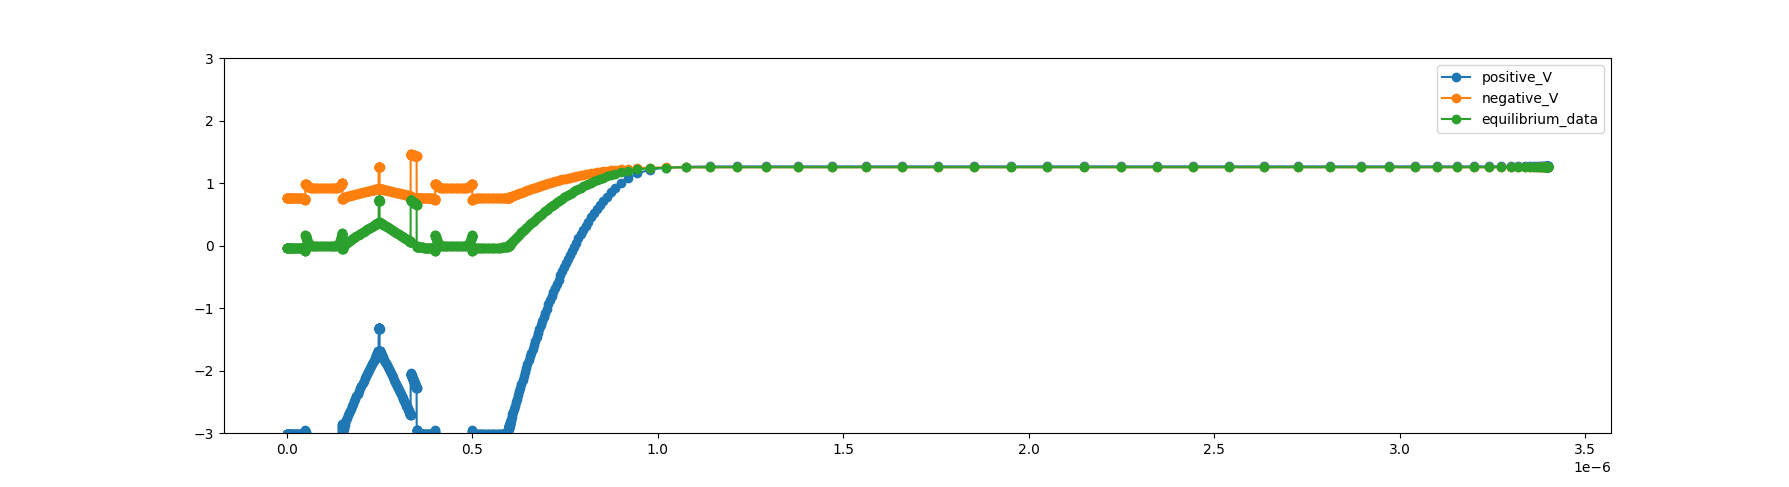

In [51]:
# for key, value in set_of_data_sun_constant.items():
#     print(key)
%matplotlib widget
plt.clf()

for i in set_of_data_sun_constant[0]["equilibrium_data"]["Properties"]:
    print(i)

x = set_of_data_sun_constant[0]["short_circuit_data"]["Bandstructure"]["x"]
Ec = set_of_data_sun_constant[0]["short_circuit_data"]["Bandstructure"]["Ec"]
# plt.plot(x, Ec, marker="o")

x = set_of_data_sun_constant[0]["pdd_data"]["positive_V"]["Bandstructure"]["x"]
Ec = set_of_data_sun_constant[0]["pdd_data"]["positive_V"]["Bandstructure"]["Ec"]
plt.plot(x, Ec, marker="o", label="positive_V")

x = set_of_data_sun_constant[0]["pdd_data"]["negative_V"]["Bandstructure"]["x"]
Ec = set_of_data_sun_constant[0]["pdd_data"]["negative_V"]["Bandstructure"]["Ec"]
plt.plot(x, Ec, marker="o", label="negative_V")
plt.ylim(-3,3)

x = set_of_data_sun_constant[0]["equilibrium_data"]["Bandstructure"]["x"]
Ec = set_of_data_sun_constant[0]["equilibrium_data"]["Bandstructure"]["Ec"]
plt.plot(x, Ec, marker="o", label="equilibrium_data")
plt.legend()

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from solcore.structure import Junction
from solcore.solar_cell import SolarCell
from solcore.light_source import LightSource
from solcore.solar_cell_solver import solar_cell_solver
from solcore.graphing.Custom_Colours import colours

# TODO This needs some explanations/descriptions

T = 298

Vin = np.linspace(-6, 2, 600)
V = np.linspace(-1.5, 4, 500)
wl = np.linspace(350, 2000, 301) * 1e-9
light_source = LightSource(source_type='standard', version='AM1.5g',
                           x=wl, output_units='photon_flux_per_m',
                           concentration=1)

color = ['b', 'g', 'r']
label = ['Top', 'Mid', 'Bot']

fig, ax = plt.subplots(1, 2, sharey='all', figsize=(7, 4.5))

for k, rad in enumerate([False, True]):

    # Input data for the 2D kind of junction
    db_junction = Junction(kind='2D', T=T, reff=0.3,
                           jref=300, Eg=0.66, A=1, R_shunt=np.inf, n=1)
    db_junction2 = Junction(kind='2D', T=T, reff=1,
                            jref=300, Eg=1.4, A=1, R_shunt=np.inf, n=1)
    db_junction3 = Junction(kind='2D', T=T, reff=1,
                            jref=300, Eg=1.8, A=1, R_shunt=np.inf, n=1)
    # n is the ideality factor of the diode. It is 1 for a perfect diode,
    # but can be higher for a real diode.

    my_solar_cell = SolarCell([db_junction3, db_junction2, db_junction],
                              T=T, R_series=0)

    solar_cell_solver(my_solar_cell, 'iv',
                      user_options={'T_ambient': T, 'voltages': V,
                                    'light_iv': True, 'wavelength': wl,
                                    'light_source': light_source,
                                    'radiative_coupling': rad, 'mpp': True,
                                    'internal_voltages': Vin})

    # This is the total junction IV
    ax[k].plot(my_solar_cell.iv['IV'][0], my_solar_cell.iv['IV'][1], marker='o',
               color=colours("Black"), ls='-',
               markerfacecolor='none', markeredgecolor=colours("Black"))

    # This is the junction IV when it is in the MJ device, including coupling if it
    # is enabled.
    for i, data in enumerate(my_solar_cell.iv['junction IV']):
        ax[k].plot(data[0], data[1], color[i] + '--', linewidth=2)

    # This is the junction IV as if it were an isolated device and therefore not
    # affected by coupling or current limiting.
    for i in range(my_solar_cell.junctions):
        ax[k].plot(V, -my_solar_cell(i).iv(V), color[i], linewidth=2, label=label[i])

    ax[k].set_ylim(0, 300)
    ax[k].set_xlim(0, 3.5)

    ax[k].set_xlabel('Bias (V)')

    Isc = my_solar_cell.iv["Isc"]
    Voc = my_solar_cell.iv["Voc"]
    FF = my_solar_cell.iv["FF"] * 100
    Eta = my_solar_cell.iv["Eta"] * 100

    ax[k].text(1.75, 275, 'I$_{sc}$ = ' + str(round(Isc, 1)) + ' A/m$^2$', fontsize=12)
    ax[k].text(1.75, 250, 'V$_{oc}$ = ' + str(round(Voc, 2)) + ' V', fontsize=12)
    ax[k].text(1.75, 225, 'FF = {:.1f} %'.format(FF), fontsize=12)
    ax[k].text(1.75, 200, r'$\eta$ = {:.1f} %'.format(Eta), fontsize=12)

ax[0].set_ylabel('Current (A/m$^2$)')
ax[0].text(0.9, 0.05, '(a)', transform=ax[0].transAxes, fontsize=12)
ax[1].text(0.9, 0.05, '(b)', transform=ax[1].transAxes, fontsize=12)
plt.tight_layout()
ax[0].legend(loc=(0.10, 0.80), frameon=False)
plt.show()

In [ ]:

# for i in sim_mat.__dict__:
#     print(i)
# print(ToStructure(sim_mat))
# print(str(sim_mat))
for i in sim_mat.__dict__:
    print(i)
data_test = dict(
    T=sim_mat.T,
    absorbed=sim_mat.absorbed,
    short_circuit_data=sim_mat[0].short_circuit_data.copy(),
    pdd_data=sim_mat[0].pdd_data.copy(),
    recombination_currents=sim_mat[0].recombination_currents.copy(),
    equilibrium_data=sim_mat[0].equilibrium_data.copy(),    
    iv=sim_mat.iv.copy(),
    offset=sim_mat[0].offset
)
print('======================')
print(data_test["iv"]["Pmpp"])
for i in data_test["iv"]['Bandstructure']:
    print(i)

# with open(f'yoyo.pkl', 'wb') as fin:
#     pickle.dump(sim_mat[0], fin)    

In [ ]:
# flash = State
# flash.meshpoints = -400
# flash.growth_rate = 0.7
# flash.coarse = 20e-9
# flash.fine = 1e-9
# flash.ultrafine = 0.2e-9
# flash.RTol = 1e-4
# flash.clamp = 20
# for i in flash.__dict__:
#     print(i)

In [1]:
plt.plot(sim_mat['QDSC_InSb_GaSb'].pdd_data['negative_V']['Bandstructure']['x']*1e9, sim_mat[0].pdd_data['negative_V']['Bandstructure']['Ec'], label="Ec" )
plt.plot(sim_mat['QDSC_InSb_GaSb'].pdd_data['negative_V']['Bandstructure']['x']*1e9, sim_mat[0].pdd_data['negative_V']['Bandstructure']['Ev'], label="Ev")
plt.plot(sim_mat['QDSC_InSb_GaSb'].pdd_data['negative_V']['Bandstructure']['x']*1e9, sim_mat[0].pdd_data['negative_V']['Bandstructure']['Efe'],label="Efe")
plt.plot(sim_mat['QDSC_InSb_GaSb'].pdd_data['negative_V']['Bandstructure']['x']*1e9, sim_mat[0].pdd_data['negative_V']['Bandstructure']['Efh'],label="Efh")
plt.plot(sim_mat['QDSC_InSb_GaSb'].pdd_data['negative_V']['Bandstructure']['x']*1e9, sim_mat[0].pdd_data['negative_V']['Bandstructure']['potential'],label="potential")

NameError: name 'plt' is not defined

In [ ]:
plt.plot(sim_mat['dot size =1.00e-01 nm'].pdd_data['positive_V']['Bandstructure']['x']*1e9, sim_mat[0].pdd_data['positive_V']['Bandstructure']['Ec'],'b', label="Ec" )
plt.plot(sim_mat['dot size =1.00e-01 nm'].pdd_data['positive_V']['Bandstructure']['x']*1e9, sim_mat[0].pdd_data['positive_V']['Bandstructure']['Ev'],'r',label="Ev")
plt.plot(sim_mat['dot size =1.00e-01 nm'].pdd_data['positive_V']['Bandstructure']['x']*1e9, sim_mat[0].pdd_data['positive_V']['Bandstructure']['Efe'],'b--', label="Efe")
plt.plot(sim_mat['dot size =1.00e-01 nm'].pdd_data['positive_V']['Bandstructure']['x']*1e9, sim_mat[0].pdd_data['positive_V']['Bandstructure']['Efh'],'r--',label="Efh")
plt.plot(sim_mat['dot size =1.00e-01 nm'].pdd_data['positive_V']['Bandstructure']['x']*1e9, sim_mat[0].pdd_data['positive_V']['Bandstructure']['potential'],label="potential")

In [ ]:
wl = np.linspace(350, 3000, 401) * 1e-9  # version1
light_source = LightSource(source_type="standard"
                           , version="AM1.5g"
                           , x=wl
                           , output_units="photon_flux_per_m"
                           , concentration=1
                           )
vint = np.linspace(-3, 3, 600)
V = np.linspace(-1.5, 0, 300)  # np
# V = np.linspace(-3.5, 3.5, 300)
# V = np.linspace(0,3.5,300) # pn
con_light = np.logspace(0, 3, 5)
# con_light = np.linspace(1, 2, 5)

data = {"allI": [],
        "Isc": [],
        "Voc": [],
        "FF": [],
        "Pmpp": [],
        "absorbed": [],
        "xsc": [],
        "nsc": [],
        "psc": [],
        "xeq": [],
        "neq": [],
        "peq": [],
        }
deta_mode = {
    "allI": [],
    "Isc": [],
    "Voc": [],
    "FF": [],
    "Pmpp": [],
    "absorbed": [],
    "mode": [],
    "xsc": [],
    "nsc": [],
    "psc": [],
    "xeq": [],
    "neq": [],
    "peq": [],
}
set_of_data = []